NOTE: The goal of this Colab is to perform Data Augmentation, so no A.I. training yet.

Load Dependencies

In [0]:
import torch
import torchvision
import torch.optim as optim
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

Download Pet dataset for demonstration purposes.

Source: https://pytorch.org/vision/main/generated/torchvision.datasets.OxfordIIITPet.html

In [0]:
data = torchvision.datasets.OxfordIIITPet(
    root = "./data",
    download = True,
    transform = transforms.ToTensor(),
    split = "test"
)

  0%|          | 0/791918971 [00:00<?, ?it/s]

Extracting data/oxford-iiit-pet/images.tar.gz to data/oxford-iiit-pet


  0%|          | 0/19173078 [00:00<?, ?it/s]

Extracting data/oxford-iiit-pet/annotations.tar.gz to data/oxford-iiit-pet


Define Function for visualization

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), aspect='auto')
    plt.show()

Let's use the first sample as our sample image

In [0]:
img = data[0][0]

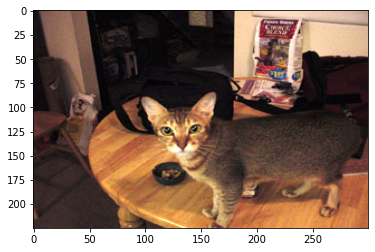

In [0]:
imshow(img)

1. Add Filters (change color, tune brightness)

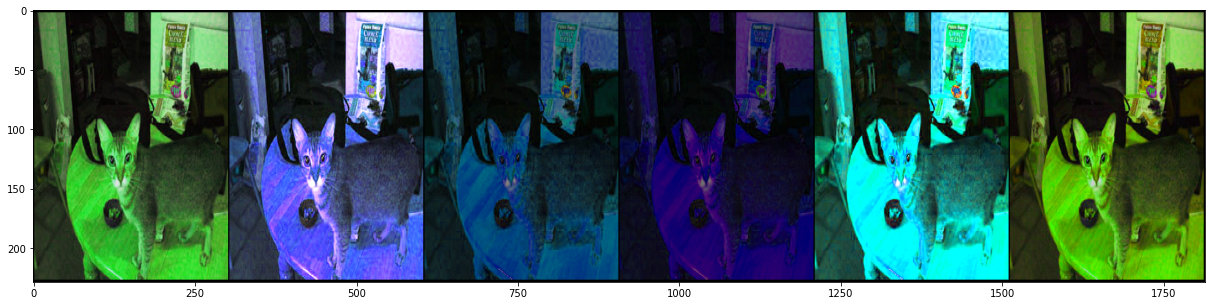

In [0]:
# Doc: https://pytorch.org/vision/main/generated/torchvision.transforms.ColorJitter.html
transforms = torchvision.transforms.Compose([
    torchvision.transforms.ColorJitter(
        hue = (-0.5, 0.5), # randomly selected from left min right max
        saturation = (0.5, 3), # randomly selected from left min right max
        brightness = (0.3, 1.5) # randomly selected from left min right max
    ),
])

# Visualize Augmented Images
images = []
for i in range(6):
  images.append(transforms(img))
plt.figure(figsize = (21,5))
imshow(torchvision.utils.make_grid(images))

2. Rotation

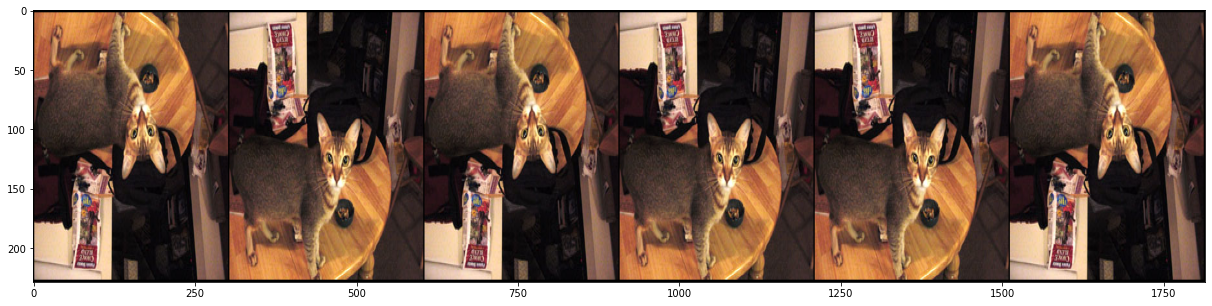

In [0]:
# Doc: https://pytorch.org/vision/main/generated/torchvision.transforms.RandomVerticalFlip.html#torchvision.transforms.RandomVerticalFlip
# Doc: https://pytorch.org/vision/main/generated/torchvision.transforms.RandomHorizontalFlip.html#torchvision.transforms.RandomHorizontalFlip
transforms = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomVerticalFlip()
])

# Visualize Augmented Images
images = []
for i in range(6):
  images.append(transforms(img))
plt.figure(figsize = (21,5))
imshow(torchvision.utils.make_grid(images))

3. Move Images

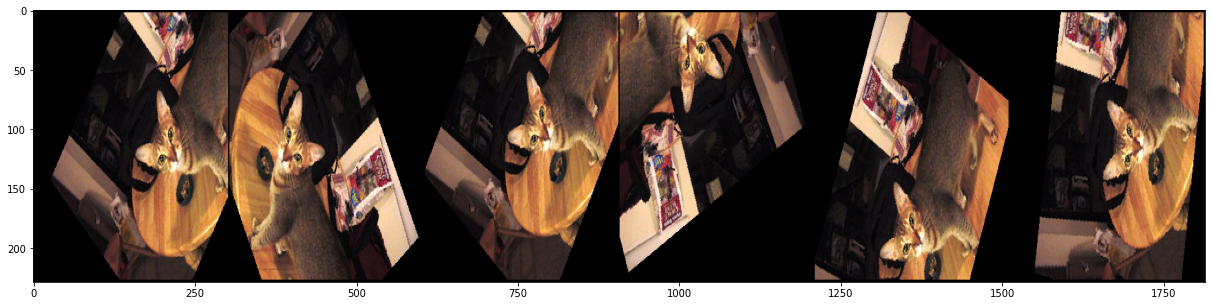

In [0]:
# Doc: https://pytorch.org/vision/main/generated/torchvision.transforms.RandomVerticalFlip.html#torchvision.transforms.RandomVerticalFlip
# Doc: https://pytorch.org/vision/main/generated/torchvision.transforms.RandomHorizontalFlip.html#torchvision.transforms.RandomHorizontalFlip
transform = torchvision.transforms.RandomAffine(
  degrees = (43, 316), # random rotate with min: 43 degrees and max: 316 degrees
  translate = (0.2, 0.27)
      # horizontal shift is randomly sampled in the range -img_width * 0.2 < dx < img_width * 2
      # vertical shift is randomly sampled in the range -img_height * 0.27 < dy < img_height * 0.27
)

# Visualize Augmented Images
images = []
for i in range(6):
  images.append(transform(img))
plt.figure(figsize = (21,5))
imshow(torchvision.utils.make_grid(images))

4. Blur

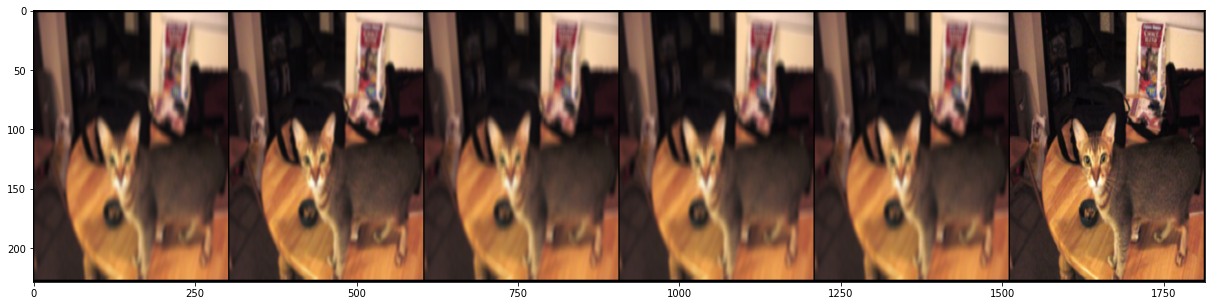

In [0]:
# Doc: https://pytorch.org/vision/main/generated/torchvision.transforms.functional.gaussian_blur.html
transforms = torchvision.transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))

# Visualize Augmented Images
images = []
for i in range(6):
  images.append(transforms(img))
plt.figure(figsize = (21,5))
imshow(torchvision.utils.make_grid(images))

5. Remove parts with dark background

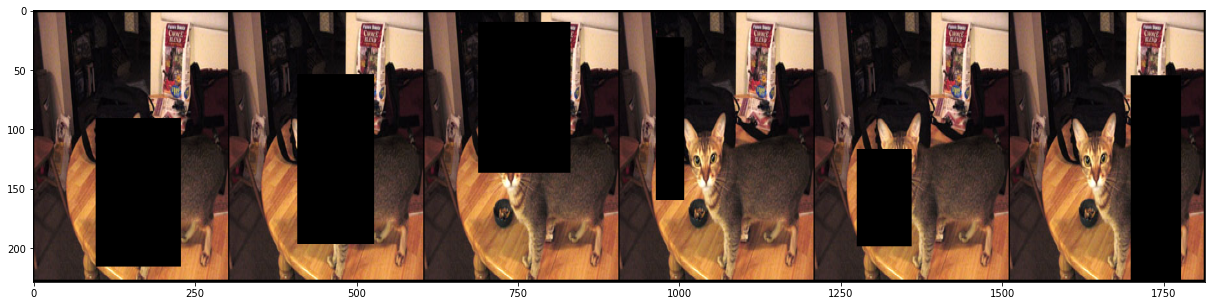

In [0]:
# Doc: https://pytorch.org/vision/main/generated/torchvision.transforms.RandomErasing.html
transforms = torchvision.transforms.RandomErasing(
    p = 0.7 # probability of erasing occuring is 70% (probably do 8 ~ 17% on serious cases in my opinion)
)

# Visualize Augmented Images
images = []
for i in range(6):
  images.append(transforms(img))
plt.figure(figsize = (21,5))
imshow(torchvision.utils.make_grid(images))

6. Add Noise

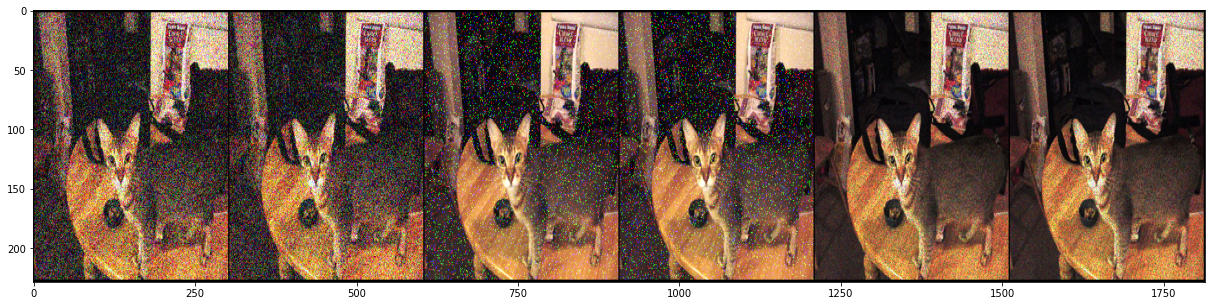

In [0]:
# Doc: https://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise
from skimage.util import random_noise
def gaussian_noise(img):
  return torch.tensor(random_noise(img, mode='gaussian', mean=0, var=0.05, clip=True))
def salt_and_paper_noise(img):
  return torch.tensor(random_noise(img, mode='salt', amount=0.05))
def sparkle_noise(img):
  return torch.tensor(random_noise(img, mode='speckle', mean=0, var=0.05, clip=True))

# Visualize Augmented Images
images = [
  gaussian_noise(img),
  gaussian_noise(img),
  salt_and_paper_noise(img),
  salt_and_paper_noise(img),
  sparkle_noise(img),
  sparkle_noise(img)
]
plt.figure(figsize = (21,5))
imshow(torchvision.utils.make_grid(images))

7. Random Resize

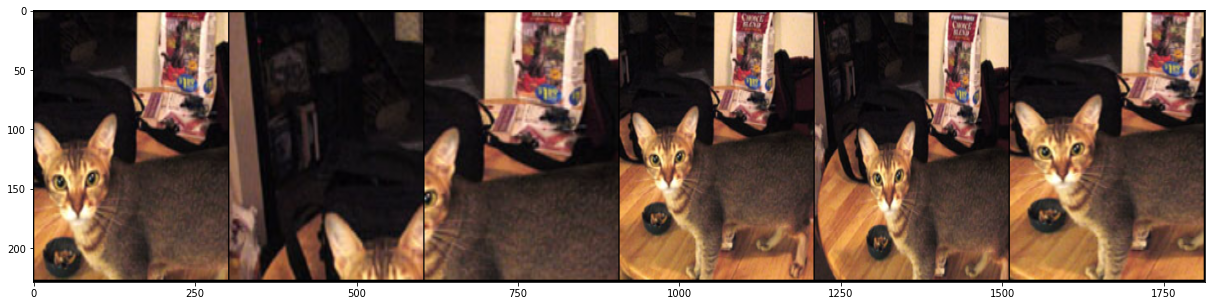

In [0]:
# Doc: https://pytorch.org/vision/main/generated/torchvision.transforms.RandomResizedCrop.html
transforms = torchvision.transforms.RandomResizedCrop(size=(225, 300)) # Keep original image size
# Visualize Augmented Images
images = []
for i in range(6):
  images.append(transforms(img))
plt.figure(figsize = (21,5))
imshow(torchvision.utils.make_grid(images))

Let's load our Dataset again with all of these Augmentation methods applied

In [0]:
transform = transforms.Compose([
    # Convert Data to Tensors
    transforms.ToTensor(),
    # 1. Apply Color Filters
    torchvision.transforms.ColorJitter(
        hue = (-0.5, 0.5), # randomly selected from left min right max
        saturation = (1, 1.2), # randomly selected from left min right max
        brightness = (1, 1.12) # randomly selected from left min right max
    ),
    # 2. Apply Random Rotations
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomVerticalFlip(),
    # 3. Apply Random Image Translations
    torchvision.transforms.RandomAffine(
      degrees = (43, 316),
      translate = (0.2, 0.27)
    ),
    # 4. Apply Random Image Blurs
    torchvision.transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    # 5. Apply Random Part Removals With Dark Background
    torchvision.transforms.RandomErasing(p = 0.08),
    # 6. Apply Random Resize
    torchvision.transforms.RandomResizedCrop(size=(225, 300)),

    # #7. Apply Noises...
    # gaussian_noise,
    # salt_and_paper_noise,
    # sparkle_noise
])

data = torchvision.datasets.OxfordIIITPet(
    root = "./data",
    download = True,
    transform = transform,
    split = "test"
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


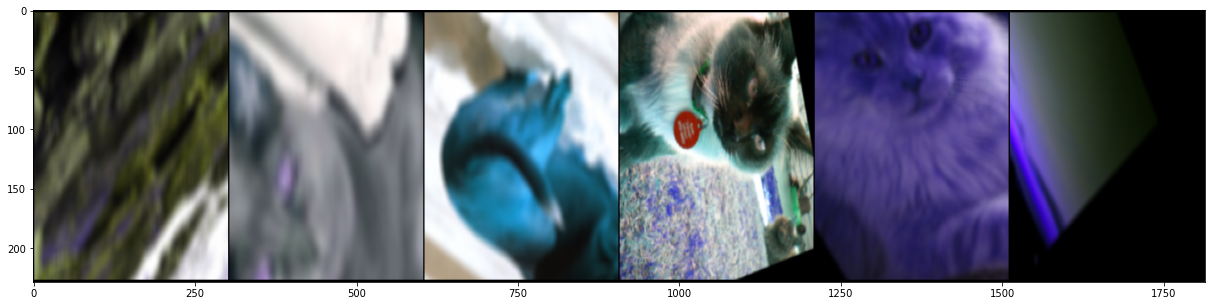

In [0]:
images = []
import random
for i in range(6):
  rand_idx = random.randint(0, len(data)-1) 
  images.append(data[rand_idx][0])
plt.figure(figsize = (21,5))
imshow(torchvision.utils.make_grid(images))